In [1]:
# Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Pull last 100 tweets from each outlet
target_users = (("@BBC", "@CBS", "@CNN",
                "@FoxNews", "@nytimes"))

# holds all results from each news source
results_list = []
tweets = []

for user in target_users:
    # holds sentiment values per tweet per user (since it's inside the for loop)
    compound_list = []
    positive_list = []
    neutral_list = []
    negative_list = []
    
    # Loop through 5 pages of tweets (20 tweets per page for 100 tweets total)
    for x in range(5):
#     oldest_tweet = none
        public_tweets = api.user_timeline(user, page=x)
        for i, tweet in enumerate(public_tweets):
            # calculate sentiment for each tweet
            # use enumerate here?  I want to store the tweet number somehow
            results = analyzer.polarity_scores(tweet["text"])
            # append each component of the sentiment score to the appropriate list
            compound_list.append(results["compound"])
            positive_list.append(results["pos"])
            neutral_list.append(results["neu"])
            negative_list.append(results["neg"])
            
#             To view one tweet to check contents/ key names, make a list that holds each tweet:
#             list.append(element)
#             tweets.append(tweet)

    # Create a dictionary to hold sentiment results (within target_user for loop so it calculates per user)
    user_results = {"User": user, 
                   "Compound Score": compound_list, 
                   "Positive Score": positive_list, 
                   "Neutral Score": neutral_list, 
                   "Negative Score": negative_list}
    # Create a list that contains a dictionary of sentiment values for each user (without list dict overwrites itself)
    results_list.append(user_results)
    
# results_list in a DataFrame, with index set as User
results_df = pd.DataFrame(results_list).set_index("User")
results_df

,Compound Score,Negative Score,Neutral Score,Positive Score
User,,,,
@BBC,"[0.5719, 0.0, -0.7269, 0.6515, 0.6908, 0.0, 0....","[0.0, 0.0, 0.405, 0.0, 0.0, 0.0, 0.0, 0.222, 0...","[0.748, 1.0, 0.523, 0.581, 0.759, 1.0, 1.0, 0....","[0.252, 0.0, 0.072, 0.419, 0.241, 0.0, 0.0, 0...."
@CBS,"[0.6696, 0.0, 0.3612, 0.0, 0.0, 0.0, 0.0, 0.58...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.817, 1.0, 0.894, 1.0, 1.0, 1.0, 1.0, 0.806,...","[0.183, 0.0, 0.106, 0.0, 0.0, 0.0, 0.0, 0.194,..."
@CNN,"[0.0, 0.0772, 0.4404, -0.7783, 0.0, 0.4404, 0....","[0.0, 0.2, 0.0, 0.303, 0.0, 0.0, 0.0, 0.264, 0...","[1.0, 0.634, 0.868, 0.563, 1.0, 0.756, 1.0, 0....","[0.0, 0.166, 0.132, 0.134, 0.0, 0.244, 0.0, 0...."
@FoxNews,"[0.4939, -0.128, -0.34, -0.5423, -0.9186, -0.3...","[0.0, 0.209, 0.118, 0.209, 0.52, 0.211, 0.078,...","[0.789, 0.602, 0.882, 0.791, 0.48, 0.789, 0.92...","[0.211, 0.189, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."
@nytimes,"[0.0, -0.34, -0.3612, -0.5267, -0.1779, 0.0, 0...","[0.0, 0.194, 0.238, 0.206, 0.166, 0.0, 0.0, 0....","[1.0, 0.806, 0.762, 0.794, 0.704, 1.0, 1.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.131, 0.0, 0.0, 0.112, 0..."


In [3]:
# Use .loc to get results separated by user
# With reset index
bbc = results_df.loc["@BBC", "Compound Score"]
cbs = results_df.loc["@CBS", "Compound Score"]
cnn = results_df.loc["@CNN", "Compound Score"]
fox = results_df.loc["@FoxNews", "Compound Score"]
nyt = results_df.loc["@nytimes", "Compound Score"]

# set the x axis
x=list(range(1,101,1))

# Without resetting index
# bbc = results_df.loc[results_df["User"] == "@BBC"]
# bbc["Compound Score"]

In [4]:
# Check order of tweets to make sure graph makes sense:  (I may need to reverse order)
print(bbc)

[0.5719, 0.0, -0.7269, 0.6515, 0.6908, 0.0, 0.0, -0.5719, -0.296, 0.0, 0.0, 0.69, 0.0, 0.0, -0.8658, 0.0, 0.34, 0.4588, 0.0, 0.0, 0.5719, 0.0, -0.7269, 0.6515, 0.6908, 0.0, 0.0, -0.5719, -0.296, 0.0, 0.0, 0.69, 0.0, 0.0, -0.8658, 0.0, 0.34, 0.4588, 0.0, 0.0, 0.0, 0.0, -0.1531, -0.7777, 0.6037, 0.8126, 0.0, 0.0, 0.5499, -0.5849, 0.0, -0.4215, 0.0, 0.2023, 0.8617, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.4579, -0.6908, 0.7096, 0.0, -0.765, 0.0, 0.0, 0.0028, 0.4588, -0.2263, 0.0, 0.0, 0.4215, 0.6027, 0.0, 0.2023, 0.3164, 0.0, -0.128, -0.4003, -0.2023, 0.0, 0.7269, -0.5994, 0.7906, 0.4215, 0.0, -0.1531, 0.0, 0.0, 0.0, -0.296, 0.636, 0.0, 0.1531, 0.34, 0.4019, 0.25, 0.0]


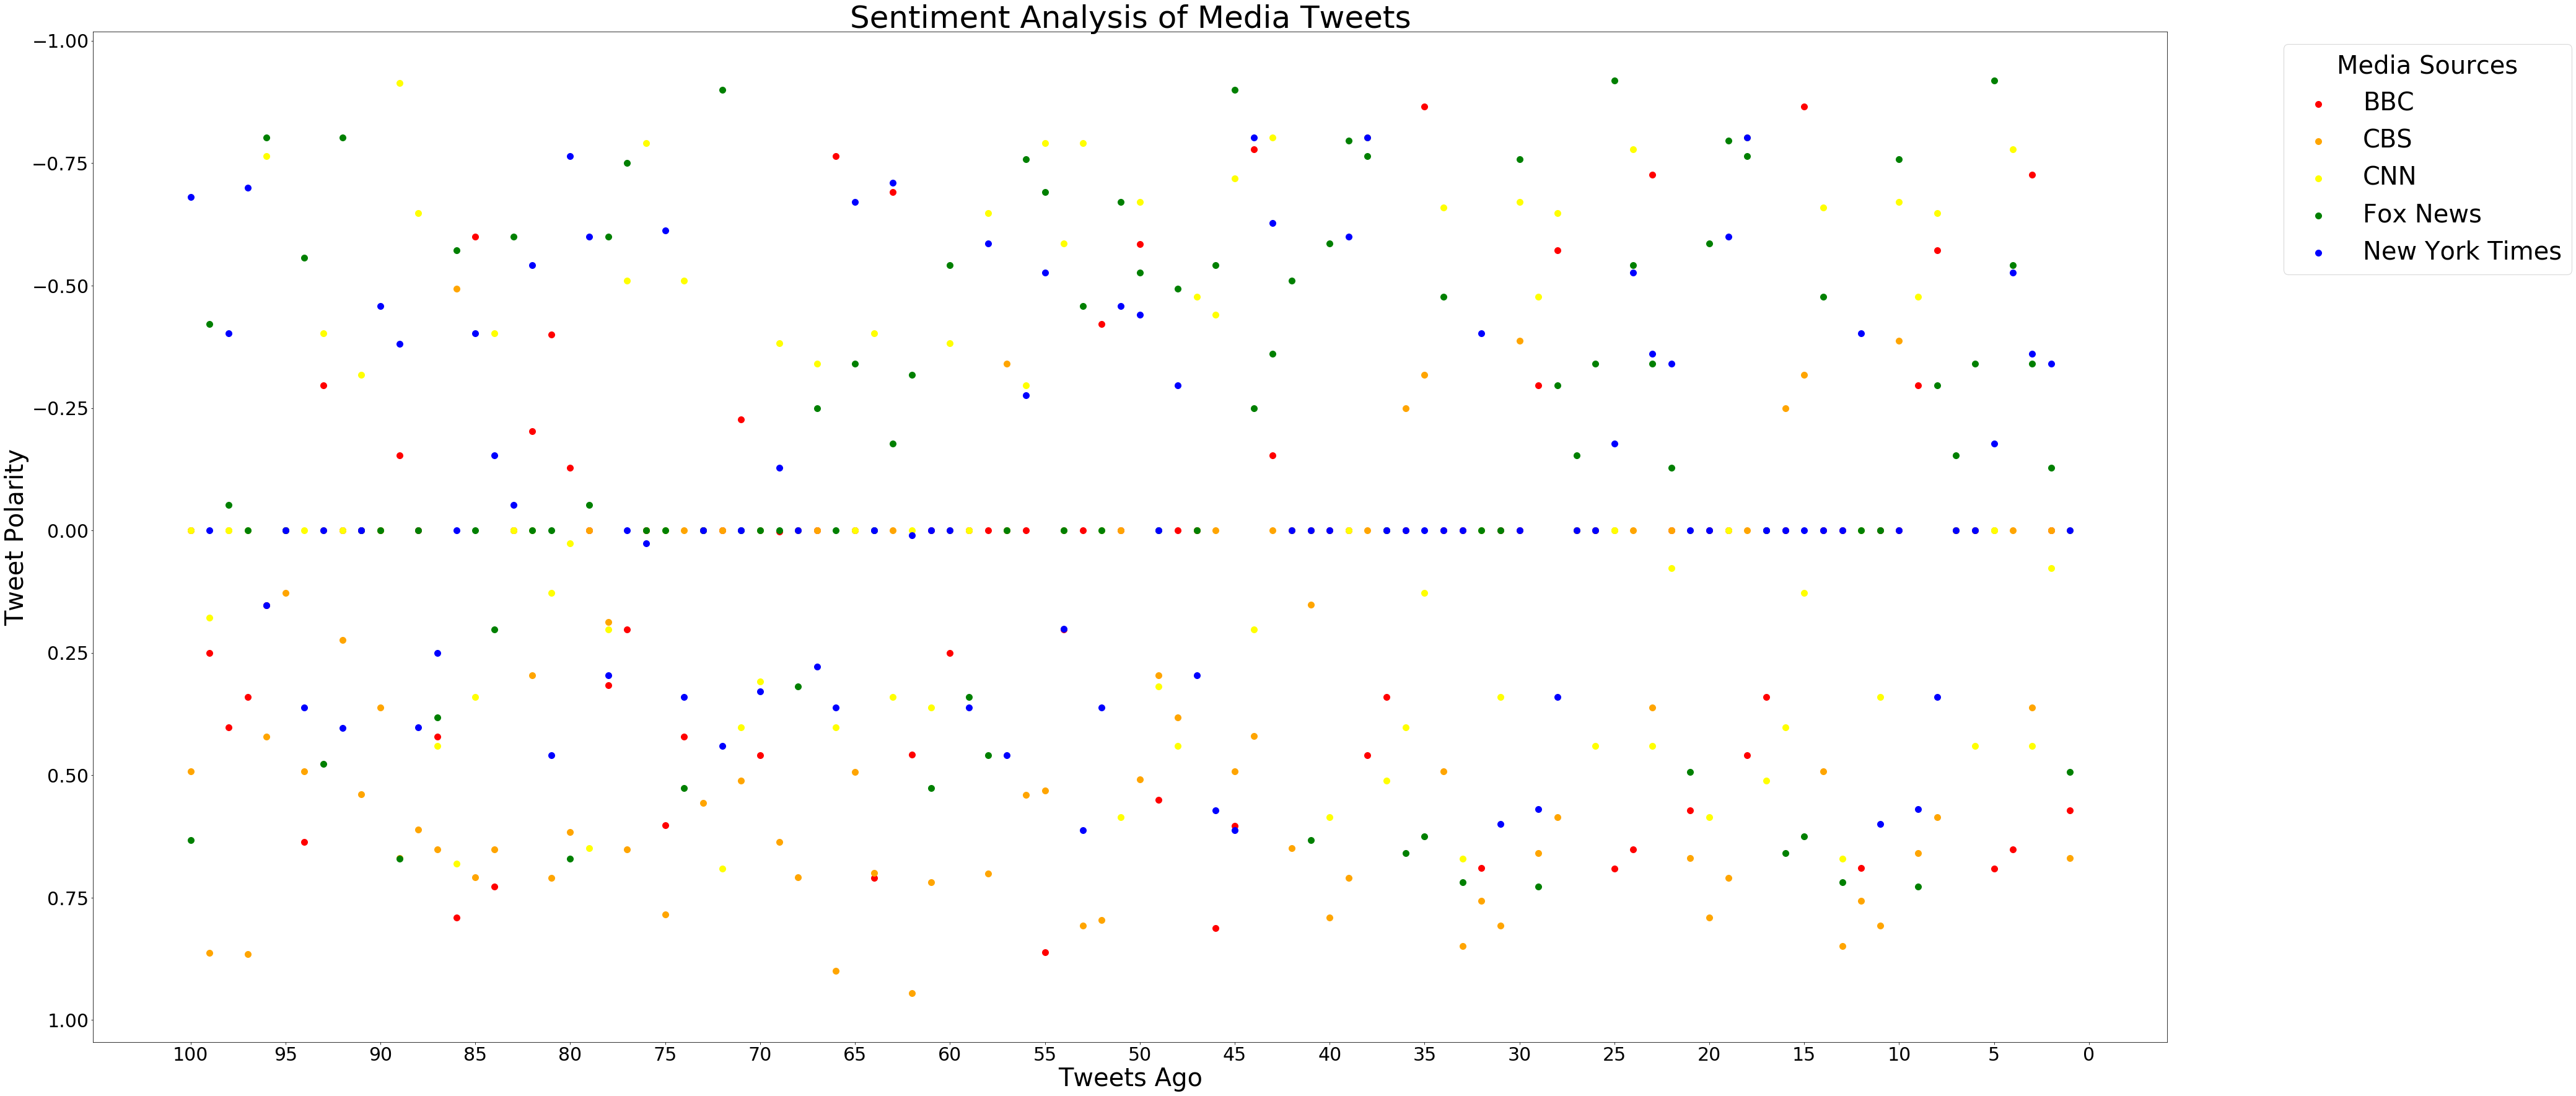

In [6]:
# Scatterplot of compound score of the last 100 tweets sent out by each news organization
# I need to calculate the tweet number for the x axis

#plt.scatter(reverse(results_df.loc(results_df["User"]="BBC")))
# Create x- axis as a list containing all values going from 1 to 100


# Create y-axis 
# y=results_df[results_df['User']=='@BBC']['Compound Score']
# y = list(reversed(y))

plt.figure(1, figsize = (60,30))


plt.scatter(x, bbc, s=100, c="red", label="BBC")
plt.scatter(x, cbs, s=100, c="orange", label="CBS")
plt.scatter(x, cnn, s=100, c="yellow", label="CNN")
plt.scatter(x, fox, s=100, c="green", label="Fox News")
plt.scatter(x, nyt, s=100, c="blue", label="New York Times")

# Create plot legend
# bbox_to_anchor is required to set the legend outside of the graph
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc = 2, title="Media Sources", fontsize=40)
# legend's title fontsize needs to be set separately from handler labels
title=legend.get_title()
title.set_fontsize(40)

plt.title("Sentiment Analysis of Media Tweets", size=50)
plt.xlabel("Tweets Ago", size=40)
plt.ylabel("Tweet Polarity", size=40)
plt.xticks(np.arange(105, step=5),size=30)
plt.yticks(size=30)

# Invert x and y axes so that tweets ago increases from right to left and the y-axis matches up correctly
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()


In [49]:
# New dataframe with average tweet sentiment value for each news organization

# Converting a GroupBy object into a DataFrame
# international_duration = pd.DataFrame(grouped_international_data["duration (seconds)"].sum())
# international_duration.head(10)

# avg_results_df = pd.DataFrame(results_list).mean()
# avg_results_df
bbc_avg = np.mean(results_list[0]["Compound Score"])
cbs_avg = np.mean(results_list[1]["Compound Score"])
cnn_avg = np.mean(results_list[2]["Compound Score"])
fox_avg = np.mean(results_list[3]["Compound Score"])
nyt_avg = np.mean(results_list[4]["Compound Score"])
all_avg = [bbc_avg, cbs_avg, cnn_avg, fox_avg, nyt_avg]
all_avg

[0.06797700000000001,
 0.356359,
 -0.09222900000000003,
 -0.051303000000000015,
 0.0074689999999999965]

In [52]:
a = results_df.index.values
a

array(['@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes'], dtype=object)

<Container object of 5 artists>

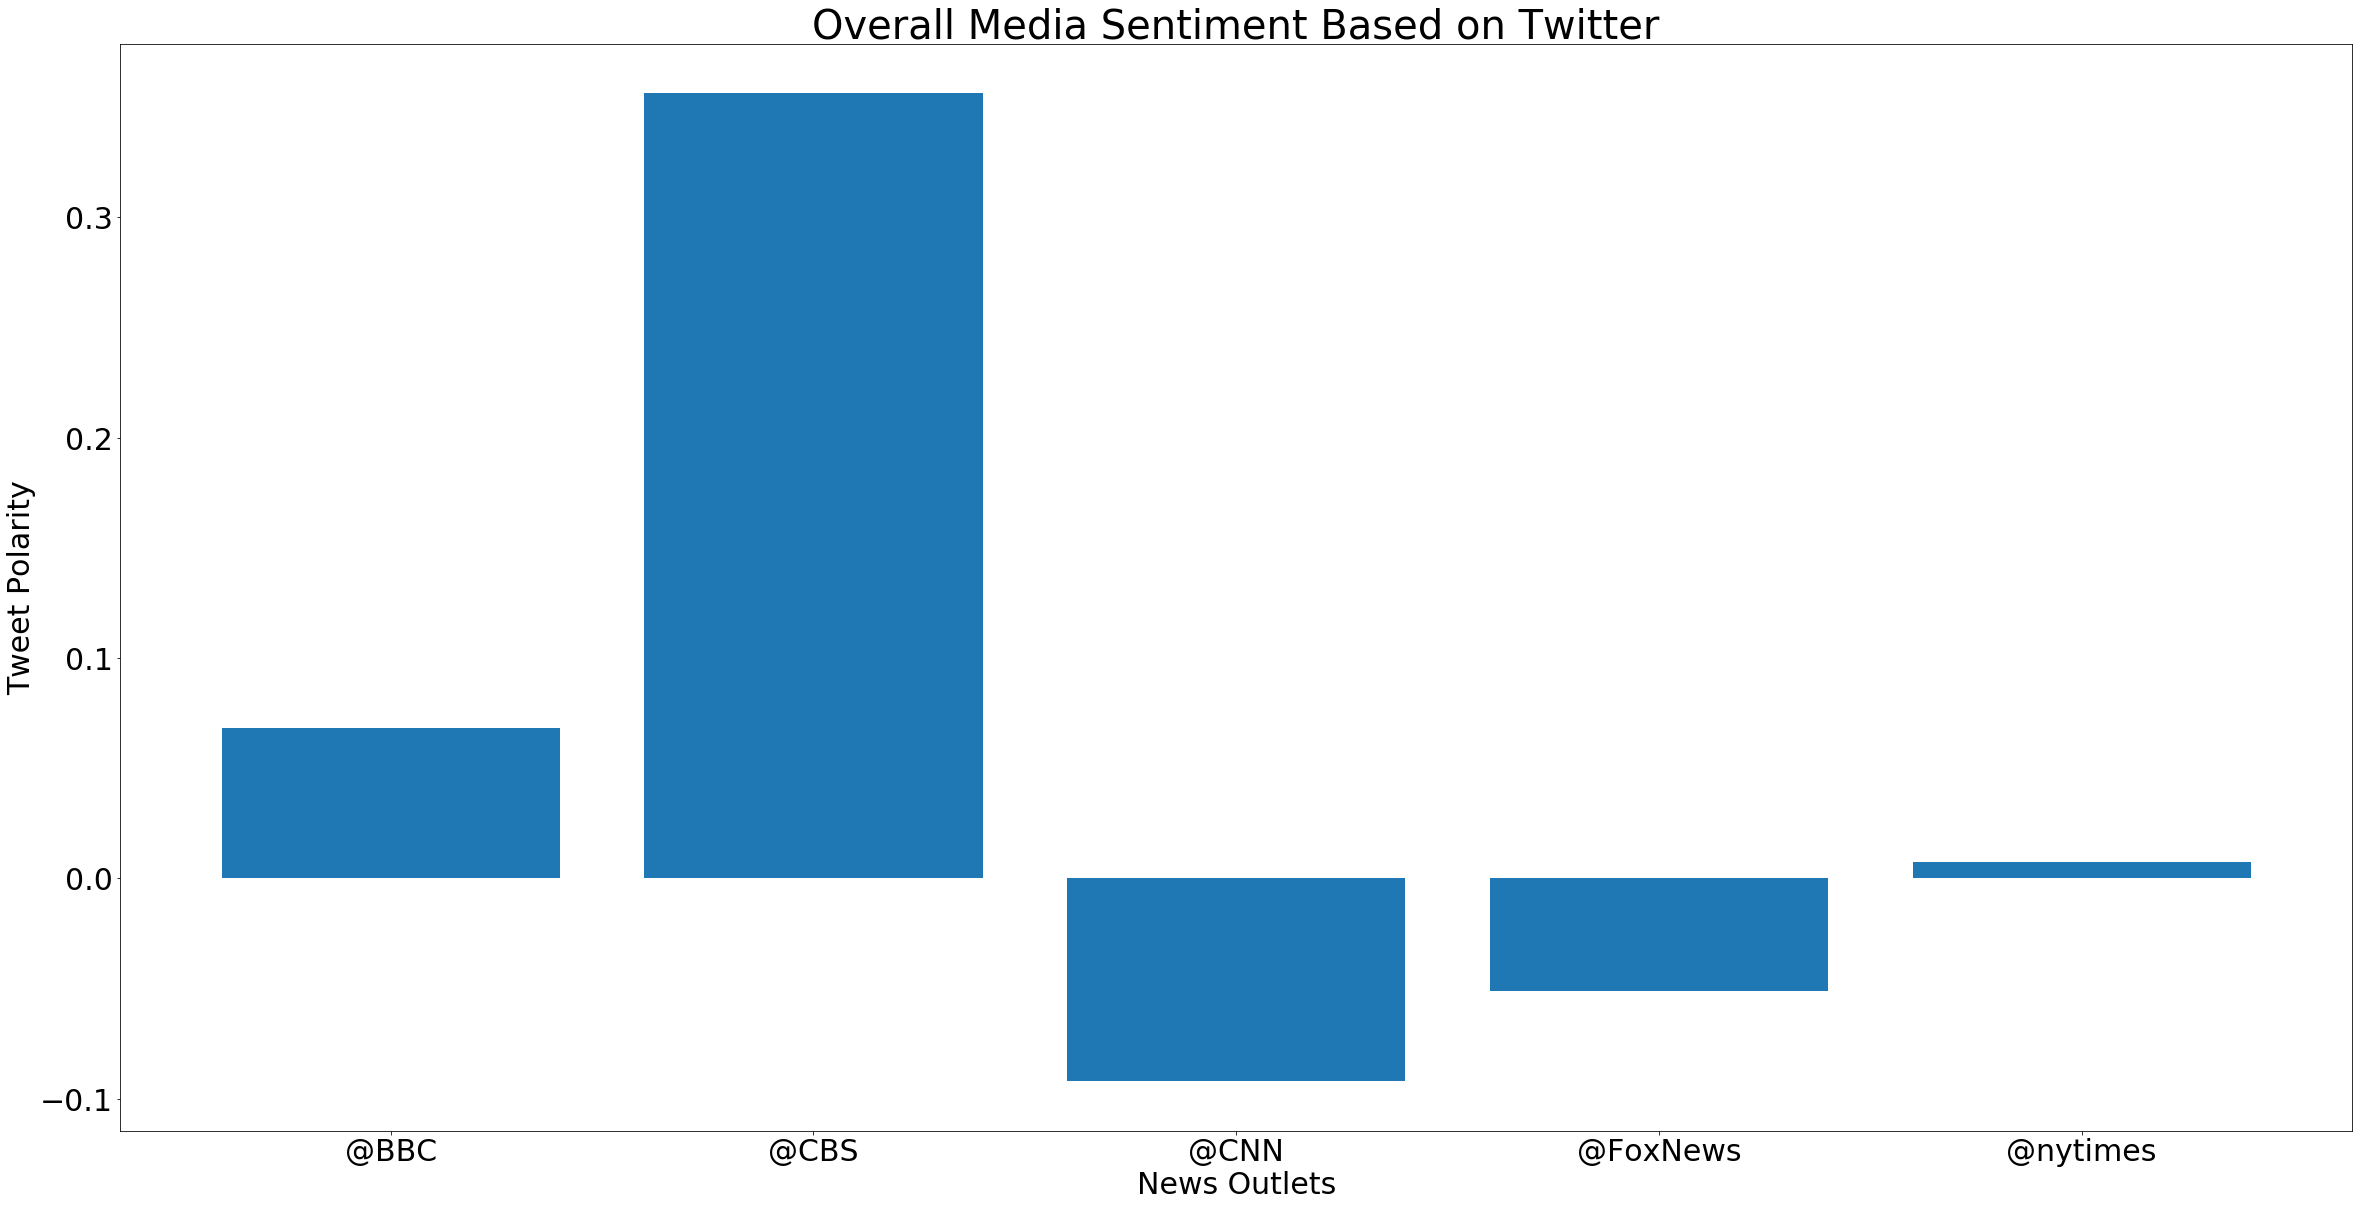

In [60]:
# Bar graph visualizing the overall sentiments of the last 100 tweets from each organization

# x_axis holds a value for each news organization
x_axis = np.arange(len(results_df["Compound Score"]))
news_outlet = results_df.index.values
tick_locations = [value for value in x_axis]

plt.figure(2, figsize=(40,20))
# Set a Title and labels
plt.title("Overall Media Sentiment Based on Twitter", size=40)
plt.xlabel("News Outlets", size=30)
plt.xticks(tick_locations, news_outlet, size=30)
plt.ylabel("Tweet Polarity", size=30)
plt.yticks(size=30)
plt.bar(x_axis, all_avg)

In [ ]:
tweets[0]

In [ ]:
len(tweets)